In [1]:
from models import GAT, GCN
from utils import Cora
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

CLASS = 7
EPOCH = 1000
TEST = 100
LR = 0.001

# Data

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = Cora.load_data()

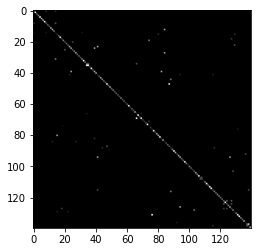

In [3]:
plt.imshow(adj[0][idx_train, :len(idx_train)].cpu(), cmap ='gray')

# Model

In [4]:
model = GCN(features.shape[-1], 1024, CLASS, 0.3, True).cuda()
# model = GAT(features.shape[-1], 16, CLASS, 0.3, True).cuda()
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model.parameters(), lr=LR)

# Training

In [6]:
features = features.cuda()
adj = adj.cuda()
labels = labels.cuda()

for i in range(EPOCH):
    optim.zero_grad()
    outputs = model(features, adj)
    loss = loss_fn(outputs[0, idx_train], labels[0, idx_train])
    loss.backward()
    optim.step()

    # precision
    predicts = outputs.argmax(dim=2)
    precision = accuracy_score(labels[0, idx_train].cpu(), predicts[0, idx_train].cpu())
    print("[{:3d}/{:3d}]  loss: {:.4f}   precision: {:5.2%}".format(i+1, EPOCH, loss, precision))
    
    if(i % TEST == TEST-1):
        model.eval()
        outputs = model(features, adj)
        loss = loss_fn(outputs[0, idx_test], labels[0, idx_test])
        
        predicts = outputs.argmax(dim=2)
        precision = accuracy_score(labels[0, idx_test].cpu(), predicts[0, idx_test].cpu())
        
        print("=============================================")
        print("[Testing]  loss: {:.4f}   precision: {:5.2%}".format(loss, precision))
        print("=============================================")
        model.train()

[  1/1000]  loss: 0.1833   precision: 97.14%
[  2/1000]  loss: 0.1774   precision: 99.29%
[  3/1000]  loss: 0.1726   precision: 99.29%
[  4/1000]  loss: 0.1520   precision: 99.29%
[  5/1000]  loss: 0.1507   precision: 100.00%
[  6/1000]  loss: 0.1471   precision: 98.57%
[  7/1000]  loss: 0.1423   precision: 99.29%
[  8/1000]  loss: 0.1406   precision: 99.29%
[  9/1000]  loss: 0.1286   precision: 99.29%
[ 10/1000]  loss: 0.1342   precision: 99.29%
[ 11/1000]  loss: 0.1235   precision: 99.29%
[ 12/1000]  loss: 0.1145   precision: 100.00%
[ 13/1000]  loss: 0.1237   precision: 100.00%
[ 14/1000]  loss: 0.1155   precision: 100.00%
[ 15/1000]  loss: 0.1099   precision: 100.00%
[ 16/1000]  loss: 0.1098   precision: 100.00%
[ 17/1000]  loss: 0.1092   precision: 100.00%
[ 18/1000]  loss: 0.1053   precision: 100.00%
[ 19/1000]  loss: 0.1049   precision: 100.00%
[ 20/1000]  loss: 0.1008   precision: 100.00%
[ 21/1000]  loss: 0.1005   precision: 100.00%
[ 22/1000]  loss: 0.1013   precision: 100.00

[187/1000]  loss: 0.0591   precision: 100.00%
[188/1000]  loss: 0.0599   precision: 100.00%
[189/1000]  loss: 0.0593   precision: 100.00%
[190/1000]  loss: 0.0588   precision: 100.00%
[191/1000]  loss: 0.0591   precision: 100.00%
[192/1000]  loss: 0.0596   precision: 100.00%
[193/1000]  loss: 0.0592   precision: 100.00%
[194/1000]  loss: 0.0593   precision: 100.00%
[195/1000]  loss: 0.0597   precision: 100.00%
[196/1000]  loss: 0.0593   precision: 100.00%
[197/1000]  loss: 0.0588   precision: 100.00%
[198/1000]  loss: 0.0588   precision: 100.00%
[199/1000]  loss: 0.0584   precision: 100.00%
[200/1000]  loss: 0.0582   precision: 100.00%
[Testing]  loss: 0.6709   precision: 78.60%
[201/1000]  loss: 0.0590   precision: 100.00%
[202/1000]  loss: 0.0584   precision: 100.00%
[203/1000]  loss: 0.0580   precision: 100.00%
[204/1000]  loss: 0.0593   precision: 100.00%
[205/1000]  loss: 0.0580   precision: 100.00%
[206/1000]  loss: 0.0585   precision: 100.00%
[207/1000]  loss: 0.0581   precision

[372/1000]  loss: 0.0471   precision: 100.00%
[373/1000]  loss: 0.0469   precision: 100.00%
[374/1000]  loss: 0.0467   precision: 100.00%
[375/1000]  loss: 0.0469   precision: 100.00%
[376/1000]  loss: 0.0464   precision: 100.00%
[377/1000]  loss: 0.0463   precision: 100.00%
[378/1000]  loss: 0.0468   precision: 100.00%
[379/1000]  loss: 0.0466   precision: 100.00%
[380/1000]  loss: 0.0466   precision: 100.00%
[381/1000]  loss: 0.0464   precision: 100.00%
[382/1000]  loss: 0.0462   precision: 100.00%
[383/1000]  loss: 0.0462   precision: 100.00%
[384/1000]  loss: 0.0458   precision: 100.00%
[385/1000]  loss: 0.0459   precision: 100.00%
[386/1000]  loss: 0.0463   precision: 100.00%
[387/1000]  loss: 0.0459   precision: 100.00%
[388/1000]  loss: 0.0461   precision: 100.00%
[389/1000]  loss: 0.0460   precision: 100.00%
[390/1000]  loss: 0.0458   precision: 100.00%
[391/1000]  loss: 0.0456   precision: 100.00%
[392/1000]  loss: 0.0459   precision: 100.00%
[393/1000]  loss: 0.0454   precisi

[545/1000]  loss: 0.0387   precision: 100.00%
[546/1000]  loss: 0.0387   precision: 100.00%
[547/1000]  loss: 0.0386   precision: 100.00%
[548/1000]  loss: 0.0384   precision: 100.00%
[549/1000]  loss: 0.0387   precision: 100.00%
[550/1000]  loss: 0.0384   precision: 100.00%
[551/1000]  loss: 0.0388   precision: 100.00%
[552/1000]  loss: 0.0384   precision: 100.00%
[553/1000]  loss: 0.0383   precision: 100.00%
[554/1000]  loss: 0.0386   precision: 100.00%
[555/1000]  loss: 0.0386   precision: 100.00%
[556/1000]  loss: 0.0387   precision: 100.00%
[557/1000]  loss: 0.0381   precision: 100.00%
[558/1000]  loss: 0.0385   precision: 100.00%
[559/1000]  loss: 0.0382   precision: 100.00%
[560/1000]  loss: 0.0383   precision: 100.00%
[561/1000]  loss: 0.0383   precision: 100.00%
[562/1000]  loss: 0.0387   precision: 100.00%
[563/1000]  loss: 0.0384   precision: 100.00%
[564/1000]  loss: 0.0384   precision: 100.00%
[565/1000]  loss: 0.0381   precision: 100.00%
[566/1000]  loss: 0.0379   precisi

[723/1000]  loss: 0.0330   precision: 100.00%
[724/1000]  loss: 0.0327   precision: 100.00%
[725/1000]  loss: 0.0324   precision: 100.00%
[726/1000]  loss: 0.0325   precision: 100.00%
[727/1000]  loss: 0.0326   precision: 100.00%
[728/1000]  loss: 0.0325   precision: 100.00%
[729/1000]  loss: 0.0323   precision: 100.00%
[730/1000]  loss: 0.0324   precision: 100.00%
[731/1000]  loss: 0.0327   precision: 100.00%
[732/1000]  loss: 0.0321   precision: 100.00%
[733/1000]  loss: 0.0323   precision: 100.00%
[734/1000]  loss: 0.0324   precision: 100.00%
[735/1000]  loss: 0.0322   precision: 100.00%
[736/1000]  loss: 0.0326   precision: 100.00%
[737/1000]  loss: 0.0323   precision: 100.00%
[738/1000]  loss: 0.0322   precision: 100.00%
[739/1000]  loss: 0.0320   precision: 100.00%
[740/1000]  loss: 0.0320   precision: 100.00%
[741/1000]  loss: 0.0320   precision: 100.00%
[742/1000]  loss: 0.0319   precision: 100.00%
[743/1000]  loss: 0.0322   precision: 100.00%
[744/1000]  loss: 0.0319   precisi

[913/1000]  loss: 0.0274   precision: 100.00%
[914/1000]  loss: 0.0279   precision: 100.00%
[915/1000]  loss: 0.0277   precision: 100.00%
[916/1000]  loss: 0.0276   precision: 100.00%
[917/1000]  loss: 0.0274   precision: 100.00%
[918/1000]  loss: 0.0274   precision: 100.00%
[919/1000]  loss: 0.0274   precision: 100.00%
[920/1000]  loss: 0.0275   precision: 100.00%
[921/1000]  loss: 0.0274   precision: 100.00%
[922/1000]  loss: 0.0273   precision: 100.00%
[923/1000]  loss: 0.0273   precision: 100.00%
[924/1000]  loss: 0.0273   precision: 100.00%
[925/1000]  loss: 0.0273   precision: 100.00%
[926/1000]  loss: 0.0272   precision: 100.00%
[927/1000]  loss: 0.0272   precision: 100.00%
[928/1000]  loss: 0.0273   precision: 100.00%
[929/1000]  loss: 0.0273   precision: 100.00%
[930/1000]  loss: 0.0272   precision: 100.00%
[931/1000]  loss: 0.0272   precision: 100.00%
[932/1000]  loss: 0.0271   precision: 100.00%
[933/1000]  loss: 0.0272   precision: 100.00%
[934/1000]  loss: 0.0271   precisi